# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

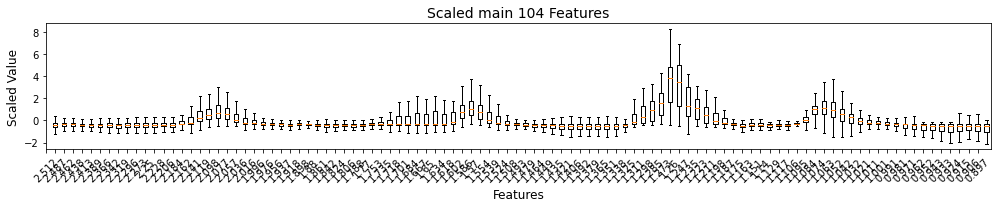

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

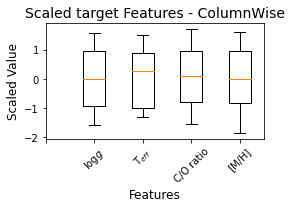

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

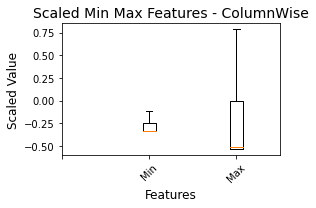

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:17 - loss: 1.8365 - gravity_loss: 0.4566 - c_o_ratio_loss: 0.4677 - metallicity_loss: 0.4448 - temperature_loss: 0.4674 - gravity_mae: 0.8589 - c_o_ratio_mae: 0.8850 - metallicity_mae: 0.8342 - temperature_mae: 0.8742

 2/13 [===>..........................] - ETA: 38s - loss: 1.8465 - gravity_loss: 0.4609 - c_o_ratio_loss: 0.4735 - metallicity_loss: 0.4507 - temperature_loss: 0.4614 - gravity_mae: 0.8639 - c_o_ratio_mae: 0.8944 - metallicity_mae: 0.8436 - temperature_mae: 0.8632 

 3/13 [=====>........................] - ETA: 36s - loss: 1.8257 - gravity_loss: 0.4587 - c_o_ratio_loss: 0.4731 - metallicity_loss: 0.4478 - temperature_loss: 0.4461 - gravity_mae: 0.8615 - c_o_ratio_mae: 0.8937 - metallicity_mae: 0.8421 - temperature_mae: 0.8445

 4/13 [========>.....................] - ETA: 32s - loss: 1.7915 - gravity_loss: 0.4599 - c_o_ratio_loss: 0.4702 - metallicity_loss: 0.4407 - temperature_loss: 0.4206 - gravity_mae: 0.8629 - c_o_ratio_mae: 0.8905 - metallicity_mae: 0.8344 - temperature_mae: 0.8120

 5/13 [==========>...................] - ETA: 29s - loss: 1.7374 - gravity_loss: 0.4562 - c_o_ratio_loss: 0.4666 - metallicity_loss: 0.4289 - temperature_loss: 0.3857 - gravity_mae: 0.8584 - c_o_ratio_mae: 0.8860 - metallicity_mae: 0.8209 - temperature_mae: 0.7652

 6/13 [============>.................] - ETA: 25s - loss: 1.6643 - gravity_loss: 0.4513 - c_o_ratio_loss: 0.4622 - metallicity_loss: 0.4124 - temperature_loss: 0.3383 - gravity_mae: 0.8524 - c_o_ratio_mae: 0.8810 - metallicity_mae: 0.8004 - temperature_mae: 0.6983

 7/13 [===============>..............] - ETA: 22s - loss: 1.6044 - gravity_loss: 0.4478 - c_o_ratio_loss: 0.4590 - metallicity_loss: 0.3917 - temperature_loss: 0.3059 - gravity_mae: 0.8485 - c_o_ratio_mae: 0.8769 - metallicity_mae: 0.7727 - temperature_mae: 0.6542

 8/13 [=================>............] - ETA: 18s - loss: 1.5925 - gravity_loss: 0.4436 - c_o_ratio_loss: 0.4566 - metallicity_loss: 0.3720 - temperature_loss: 0.3203 - gravity_mae: 0.8430 - c_o_ratio_mae: 0.8727 - metallicity_mae: 0.7466 - temperature_mae: 0.6776

 9/13 [===================>..........] - ETA: 14s - loss: 1.5639 - gravity_loss: 0.4397 - c_o_ratio_loss: 0.4532 - metallicity_loss: 0.3583 - temperature_loss: 0.3126 - gravity_mae: 0.8377 - c_o_ratio_mae: 0.8679 - metallicity_mae: 0.7287 - temperature_mae: 0.6744

10/13 [======================>.......] - ETA: 11s - loss: 1.5321 - gravity_loss: 0.4340 - c_o_ratio_loss: 0.4525 - metallicity_loss: 0.3472 - temperature_loss: 0.2985 - gravity_mae: 0.8308 - c_o_ratio_mae: 0.8671 - metallicity_mae: 0.7141 - temperature_mae: 0.6588

11/13 [========================>.....] - ETA: 7s - loss: 1.4932 - gravity_loss: 0.4295 - c_o_ratio_loss: 0.4512 - metallicity_loss: 0.3360 - temperature_loss: 0.2766 - gravity_mae: 0.8253 - c_o_ratio_mae: 0.8657 - metallicity_mae: 0.6992 - temperature_mae: 0.6229 

12/13 [==========================>...] - ETA: 3s - loss: 1.4686 - gravity_loss: 0.4264 - c_o_ratio_loss: 0.4498 - metallicity_loss: 0.3269 - temperature_loss: 0.2655 - gravity_mae: 0.8216 - c_o_ratio_mae: 0.8643 - metallicity_mae: 0.6876 - temperature_mae: 0.6085

13/13 [==============================] - ETA: 0s - loss: 1.4639 - gravity_loss: 0.4258 - c_o_ratio_loss: 0.4487 - metallicity_loss: 0.3251 - temperature_loss: 0.2643 - gravity_mae: 0.8209 - c_o_ratio_mae: 0.8629 - metallicity_mae: 0.6852 - temperature_mae: 0.6071

13/13 [==============================] - 51s 4s/step - loss: 1.4639 - gravity_loss: 0.4258 - c_o_ratio_loss: 0.4487 - metallicity_loss: 0.3251 - temperature_loss: 0.2643 - gravity_mae: 0.8209 - c_o_ratio_mae: 0.8629 - metallicity_mae: 0.6852 - temperature_mae: 0.6071 - val_loss: 1.0893 - val_gravity_loss: 0.3624 - val_c_o_ratio_loss: 0.3918 - val_metallicity_loss: 0.2009 - val_temperature_loss: 0.1343 - val_gravity_mae: 0.7445 - val_c_o_ratio_mae: 0.7959 - val_metallicity_mae: 0.5165 - val_temperature_mae: 0.4386


Epoch 2/4


 1/13 [=>............................] - ETA: 44s - loss: 1.1111 - gravity_loss: 0.3633 - c_o_ratio_loss: 0.3947 - metallicity_loss: 0.2065 - temperature_loss: 0.1467 - gravity_mae: 0.7448 - c_o_ratio_mae: 0.7967 - metallicity_mae: 0.5306 - temperature_mae: 0.4464

 2/13 [===>..........................] - ETA: 41s - loss: 1.1028 - gravity_loss: 0.3614 - c_o_ratio_loss: 0.4017 - metallicity_loss: 0.2109 - temperature_loss: 0.1288 - gravity_mae: 0.7396 - c_o_ratio_mae: 0.8062 - metallicity_mae: 0.5355 - temperature_mae: 0.4179

 3/13 [=====>........................] - ETA: 37s - loss: 1.0882 - gravity_loss: 0.3647 - c_o_ratio_loss: 0.3993 - metallicity_loss: 0.2114 - temperature_loss: 0.1128 - gravity_mae: 0.7441 - c_o_ratio_mae: 0.8024 - metallicity_mae: 0.5360 - temperature_mae: 0.3896

 4/13 [========>.....................] - ETA: 33s - loss: 1.0639 - gravity_loss: 0.3636 - c_o_ratio_loss: 0.3917 - metallicity_loss: 0.2072 - temperature_loss: 0.1013 - gravity_mae: 0.7429 - c_o_ratio_mae: 0.7924 - metallicity_mae: 0.5308 - temperature_mae: 0.3662

 5/13 [==========>...................] - ETA: 30s - loss: 1.0471 - gravity_loss: 0.3631 - c_o_ratio_loss: 0.3845 - metallicity_loss: 0.2067 - temperature_loss: 0.0929 - gravity_mae: 0.7417 - c_o_ratio_mae: 0.7824 - metallicity_mae: 0.5299 - temperature_mae: 0.3476

 6/13 [============>.................] - ETA: 26s - loss: 1.0264 - gravity_loss: 0.3629 - c_o_ratio_loss: 0.3724 - metallicity_loss: 0.2053 - temperature_loss: 0.0858 - gravity_mae: 0.7401 - c_o_ratio_mae: 0.7649 - metallicity_mae: 0.5268 - temperature_mae: 0.3326

 7/13 [===============>..............] - ETA: 22s - loss: 1.0081 - gravity_loss: 0.3631 - c_o_ratio_loss: 0.3604 - metallicity_loss: 0.2062 - temperature_loss: 0.0783 - gravity_mae: 0.7392 - c_o_ratio_mae: 0.7466 - metallicity_mae: 0.5268 - temperature_mae: 0.3136

 8/13 [=================>............] - ETA: 18s - loss: 0.9877 - gravity_loss: 0.3609 - c_o_ratio_loss: 0.3483 - metallicity_loss: 0.2055 - temperature_loss: 0.0729 - gravity_mae: 0.7356 - c_o_ratio_mae: 0.7284 - metallicity_mae: 0.5251 - temperature_mae: 0.3004

 9/13 [===================>..........] - ETA: 15s - loss: 0.9727 - gravity_loss: 0.3581 - c_o_ratio_loss: 0.3392 - metallicity_loss: 0.2050 - temperature_loss: 0.0705 - gravity_mae: 0.7316 - c_o_ratio_mae: 0.7156 - metallicity_mae: 0.5240 - temperature_mae: 0.2954

10/13 [======================>.......] - ETA: 11s - loss: 0.9605 - gravity_loss: 0.3557 - c_o_ratio_loss: 0.3320 - metallicity_loss: 0.2052 - temperature_loss: 0.0676 - gravity_mae: 0.7287 - c_o_ratio_mae: 0.7061 - metallicity_mae: 0.5245 - temperature_mae: 0.2885

11/13 [========================>.....] - ETA: 7s - loss: 0.9469 - gravity_loss: 0.3548 - c_o_ratio_loss: 0.3239 - metallicity_loss: 0.2044 - temperature_loss: 0.0638 - gravity_mae: 0.7273 - c_o_ratio_mae: 0.6948 - metallicity_mae: 0.5239 - temperature_mae: 0.2782 

12/13 [==========================>...] - ETA: 3s - loss: 0.9347 - gravity_loss: 0.3535 - c_o_ratio_loss: 0.3164 - metallicity_loss: 0.2042 - temperature_loss: 0.0606 - gravity_mae: 0.7252 - c_o_ratio_mae: 0.6840 - metallicity_mae: 0.5243 - temperature_mae: 0.2701

13/13 [==============================] - ETA: 0s - loss: 0.9327 - gravity_loss: 0.3535 - c_o_ratio_loss: 0.3150 - metallicity_loss: 0.2038 - temperature_loss: 0.0603 - gravity_mae: 0.7252 - c_o_ratio_mae: 0.6821 - metallicity_mae: 0.5239 - temperature_mae: 0.2695

13/13 [==============================] - 49s 4s/step - loss: 0.9327 - gravity_loss: 0.3535 - c_o_ratio_loss: 0.3150 - metallicity_loss: 0.2038 - temperature_loss: 0.0603 - gravity_mae: 0.7252 - c_o_ratio_mae: 0.6821 - metallicity_mae: 0.5239 - temperature_mae: 0.2695 - val_loss: 0.7046 - val_gravity_loss: 0.3106 - val_c_o_ratio_loss: 0.1853 - val_metallicity_loss: 0.1807 - val_temperature_loss: 0.0279 - val_gravity_mae: 0.6692 - val_c_o_ratio_mae: 0.4845 - val_metallicity_mae: 0.4909 - val_temperature_mae: 0.1860


Epoch 3/4


 1/13 [=>............................] - ETA: 50s - loss: 0.7583 - gravity_loss: 0.3359 - c_o_ratio_loss: 0.1857 - metallicity_loss: 0.2005 - temperature_loss: 0.0362 - gravity_mae: 0.7048 - c_o_ratio_mae: 0.4924 - metallicity_mae: 0.5232 - temperature_mae: 0.2149

 2/13 [===>..........................] - ETA: 45s - loss: 0.7328 - gravity_loss: 0.3246 - c_o_ratio_loss: 0.1822 - metallicity_loss: 0.1911 - temperature_loss: 0.0350 - gravity_mae: 0.6897 - c_o_ratio_mae: 0.4869 - metallicity_mae: 0.5085 - temperature_mae: 0.2108

 3/13 [=====>........................] - ETA: 41s - loss: 0.7242 - gravity_loss: 0.3169 - c_o_ratio_loss: 0.1790 - metallicity_loss: 0.1938 - temperature_loss: 0.0345 - gravity_mae: 0.6794 - c_o_ratio_mae: 0.4841 - metallicity_mae: 0.5083 - temperature_mae: 0.2085

 4/13 [========>.....................] - ETA: 37s - loss: 0.7169 - gravity_loss: 0.3173 - c_o_ratio_loss: 0.1769 - metallicity_loss: 0.1886 - temperature_loss: 0.0341 - gravity_mae: 0.6782 - c_o_ratio_mae: 0.4789 - metallicity_mae: 0.5018 - temperature_mae: 0.2067

 5/13 [==========>...................] - ETA: 33s - loss: 0.7127 - gravity_loss: 0.3201 - c_o_ratio_loss: 0.1739 - metallicity_loss: 0.1862 - temperature_loss: 0.0325 - gravity_mae: 0.6803 - c_o_ratio_mae: 0.4734 - metallicity_mae: 0.4983 - temperature_mae: 0.2006

 6/13 [============>.................] - ETA: 28s - loss: 0.7040 - gravity_loss: 0.3190 - c_o_ratio_loss: 0.1707 - metallicity_loss: 0.1836 - temperature_loss: 0.0307 - gravity_mae: 0.6782 - c_o_ratio_mae: 0.4681 - metallicity_mae: 0.4948 - temperature_mae: 0.1931

 7/13 [===============>..............] - ETA: 24s - loss: 0.7007 - gravity_loss: 0.3181 - c_o_ratio_loss: 0.1726 - metallicity_loss: 0.1811 - temperature_loss: 0.0289 - gravity_mae: 0.6767 - c_o_ratio_mae: 0.4696 - metallicity_mae: 0.4909 - temperature_mae: 0.1868

 8/13 [=================>............] - ETA: 20s - loss: 0.7033 - gravity_loss: 0.3192 - c_o_ratio_loss: 0.1750 - metallicity_loss: 0.1803 - temperature_loss: 0.0288 - gravity_mae: 0.6783 - c_o_ratio_mae: 0.4732 - metallicity_mae: 0.4896 - temperature_mae: 0.1869

 9/13 [===================>..........] - ETA: 16s - loss: 0.6993 - gravity_loss: 0.3188 - c_o_ratio_loss: 0.1734 - metallicity_loss: 0.1793 - temperature_loss: 0.0278 - gravity_mae: 0.6782 - c_o_ratio_mae: 0.4700 - metallicity_mae: 0.4879 - temperature_mae: 0.1835

10/13 [======================>.......] - ETA: 12s - loss: 0.6921 - gravity_loss: 0.3179 - c_o_ratio_loss: 0.1690 - metallicity_loss: 0.1781 - temperature_loss: 0.0271 - gravity_mae: 0.6771 - c_o_ratio_mae: 0.4624 - metallicity_mae: 0.4859 - temperature_mae: 0.1810

11/13 [========================>.....] - ETA: 8s - loss: 0.6864 - gravity_loss: 0.3160 - c_o_ratio_loss: 0.1664 - metallicity_loss: 0.1774 - temperature_loss: 0.0267 - gravity_mae: 0.6747 - c_o_ratio_mae: 0.4595 - metallicity_mae: 0.4847 - temperature_mae: 0.1795 

12/13 [==========================>...] - ETA: 4s - loss: 0.6803 - gravity_loss: 0.3153 - c_o_ratio_loss: 0.1621 - metallicity_loss: 0.1767 - temperature_loss: 0.0262 - gravity_mae: 0.6742 - c_o_ratio_mae: 0.4525 - metallicity_mae: 0.4837 - temperature_mae: 0.1777

13/13 [==============================] - ETA: 0s - loss: 0.6799 - gravity_loss: 0.3155 - c_o_ratio_loss: 0.1617 - metallicity_loss: 0.1766 - temperature_loss: 0.0261 - gravity_mae: 0.6745 - c_o_ratio_mae: 0.4516 - metallicity_mae: 0.4835 - temperature_mae: 0.1774

13/13 [==============================] - 52s 4s/step - loss: 0.6799 - gravity_loss: 0.3155 - c_o_ratio_loss: 0.1617 - metallicity_loss: 0.1766 - temperature_loss: 0.0261 - gravity_mae: 0.6745 - c_o_ratio_mae: 0.4516 - metallicity_mae: 0.4835 - temperature_mae: 0.1774 - val_loss: 0.5621 - val_gravity_loss: 0.2868 - val_c_o_ratio_loss: 0.0968 - val_metallicity_loss: 0.1610 - val_temperature_loss: 0.0174 - val_gravity_mae: 0.6386 - val_c_o_ratio_mae: 0.3477 - val_metallicity_mae: 0.4594 - val_temperature_mae: 0.1483


Epoch 4/4


 1/13 [=>............................] - ETA: 48s - loss: 0.6032 - gravity_loss: 0.3069 - c_o_ratio_loss: 0.1107 - metallicity_loss: 0.1677 - temperature_loss: 0.0178 - gravity_mae: 0.6653 - c_o_ratio_mae: 0.3771 - metallicity_mae: 0.4717 - temperature_mae: 0.1486

 2/13 [===>..........................] - ETA: 44s - loss: 0.5976 - gravity_loss: 0.3024 - c_o_ratio_loss: 0.1111 - metallicity_loss: 0.1667 - temperature_loss: 0.0174 - gravity_mae: 0.6570 - c_o_ratio_mae: 0.3784 - metallicity_mae: 0.4701 - temperature_mae: 0.1482

 3/13 [=====>........................] - ETA: 40s - loss: 0.6031 - gravity_loss: 0.3011 - c_o_ratio_loss: 0.1154 - metallicity_loss: 0.1694 - temperature_loss: 0.0172 - gravity_mae: 0.6540 - c_o_ratio_mae: 0.3813 - metallicity_mae: 0.4734 - temperature_mae: 0.1462

 4/13 [========>.....................] - ETA: 36s - loss: 0.5914 - gravity_loss: 0.2965 - c_o_ratio_loss: 0.1108 - metallicity_loss: 0.1670 - temperature_loss: 0.0171 - gravity_mae: 0.6475 - c_o_ratio_mae: 0.3729 - metallicity_mae: 0.4699 - temperature_mae: 0.1450

 5/13 [==========>...................] - ETA: 32s - loss: 0.5933 - gravity_loss: 0.2995 - c_o_ratio_loss: 0.1096 - metallicity_loss: 0.1672 - temperature_loss: 0.0170 - gravity_mae: 0.6503 - c_o_ratio_mae: 0.3703 - metallicity_mae: 0.4698 - temperature_mae: 0.1444

 6/13 [============>.................] - ETA: 28s - loss: 0.5849 - gravity_loss: 0.2960 - c_o_ratio_loss: 0.1066 - metallicity_loss: 0.1654 - temperature_loss: 0.0168 - gravity_mae: 0.6446 - c_o_ratio_mae: 0.3634 - metallicity_mae: 0.4662 - temperature_mae: 0.1427

 7/13 [===============>..............] - ETA: 24s - loss: 0.5762 - gravity_loss: 0.2916 - c_o_ratio_loss: 0.1046 - metallicity_loss: 0.1633 - temperature_loss: 0.0167 - gravity_mae: 0.6392 - c_o_ratio_mae: 0.3585 - metallicity_mae: 0.4629 - temperature_mae: 0.1419

 8/13 [=================>............] - ETA: 20s - loss: 0.5723 - gravity_loss: 0.2914 - c_o_ratio_loss: 0.1034 - metallicity_loss: 0.1611 - temperature_loss: 0.0165 - gravity_mae: 0.6394 - c_o_ratio_mae: 0.3567 - metallicity_mae: 0.4602 - temperature_mae: 0.1413

 9/13 [===================>..........] - ETA: 15s - loss: 0.5676 - gravity_loss: 0.2897 - c_o_ratio_loss: 0.1019 - metallicity_loss: 0.1598 - temperature_loss: 0.0162 - gravity_mae: 0.6371 - c_o_ratio_mae: 0.3533 - metallicity_mae: 0.4583 - temperature_mae: 0.1399

10/13 [======================>.......] - ETA: 11s - loss: 0.5625 - gravity_loss: 0.2877 - c_o_ratio_loss: 0.1002 - metallicity_loss: 0.1585 - temperature_loss: 0.0160 - gravity_mae: 0.6345 - c_o_ratio_mae: 0.3493 - metallicity_mae: 0.4562 - temperature_mae: 0.1388

11/13 [========================>.....] - ETA: 7s - loss: 0.5589 - gravity_loss: 0.2868 - c_o_ratio_loss: 0.0981 - metallicity_loss: 0.1581 - temperature_loss: 0.0159 - gravity_mae: 0.6333 - c_o_ratio_mae: 0.3449 - metallicity_mae: 0.4560 - temperature_mae: 0.1379 

12/13 [==========================>...] - ETA: 3s - loss: 0.5537 - gravity_loss: 0.2849 - c_o_ratio_loss: 0.0962 - metallicity_loss: 0.1569 - temperature_loss: 0.0157 - gravity_mae: 0.6305 - c_o_ratio_mae: 0.3410 - metallicity_mae: 0.4545 - temperature_mae: 0.1370

13/13 [==============================] - ETA: 0s - loss: 0.5525 - gravity_loss: 0.2844 - c_o_ratio_loss: 0.0958 - metallicity_loss: 0.1567 - temperature_loss: 0.0157 - gravity_mae: 0.6299 - c_o_ratio_mae: 0.3401 - metallicity_mae: 0.4540 - temperature_mae: 0.1369

13/13 [==============================] - 51s 4s/step - loss: 0.5525 - gravity_loss: 0.2844 - c_o_ratio_loss: 0.0958 - metallicity_loss: 0.1567 - temperature_loss: 0.0157 - gravity_mae: 0.6299 - c_o_ratio_mae: 0.3401 - metallicity_mae: 0.4540 - temperature_mae: 0.1369 - val_loss: 0.4792 - val_gravity_loss: 0.2516 - val_c_o_ratio_loss: 0.0735 - val_metallicity_loss: 0.1414 - val_temperature_loss: 0.0127 - val_gravity_mae: 0.5845 - val_c_o_ratio_mae: 0.2943 - val_metallicity_mae: 0.4311 - val_temperature_mae: 0.1232


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 2:51

  3/782 [..............................] - ETA: 42s 

  4/782 [..............................] - ETA: 44s

  5/782 [..............................] - ETA: 44s

  6/782 [..............................] - ETA: 43s

  7/782 [..............................] - ETA: 43s

  8/782 [..............................] - ETA: 43s

  9/782 [..............................] - ETA: 43s

 10/782 [..............................] - ETA: 43s

 11/782 [..............................] - ETA: 43s

 12/782 [..............................] - ETA: 43s

 13/782 [..............................] - ETA: 43s

 14/782 [..............................] - ETA: 43s

 15/782 [..............................] - ETA: 43s

 16/782 [..............................] - ETA: 43s

 17/782 [..............................] - ETA: 43s

 18/782 [..............................] - ETA: 43s

 19/782 [..............................] - ETA: 44s

 20/782 [..............................] - ETA: 43s

 21/782 [..............................] - ETA: 43s

 22/782 [..............................] - ETA: 43s

 23/782 [..............................] - ETA: 43s

 24/782 [..............................] - ETA: 43s

 25/782 [..............................] - ETA: 43s

 26/782 [..............................] - ETA: 43s

 27/782 [>.............................] - ETA: 43s

 28/782 [>.............................] - ETA: 43s

 29/782 [>.............................] - ETA: 43s

 30/782 [>.............................] - ETA: 43s

 31/782 [>.............................] - ETA: 43s

 32/782 [>.............................] - ETA: 43s

 33/782 [>.............................] - ETA: 43s

 34/782 [>.............................] - ETA: 43s

 35/782 [>.............................] - ETA: 43s

 36/782 [>.............................] - ETA: 43s

 37/782 [>.............................] - ETA: 43s

 38/782 [>.............................] - ETA: 43s

 39/782 [>.............................] - ETA: 43s

 40/782 [>.............................] - ETA: 43s

 41/782 [>.............................] - ETA: 43s

 42/782 [>.............................] - ETA: 42s

 43/782 [>.............................] - ETA: 42s

 44/782 [>.............................] - ETA: 42s

 45/782 [>.............................] - ETA: 42s

 46/782 [>.............................] - ETA: 42s

 47/782 [>.............................] - ETA: 43s

 48/782 [>.............................] - ETA: 42s

 49/782 [>.............................] - ETA: 42s

 50/782 [>.............................] - ETA: 42s

 51/782 [>.............................] - ETA: 42s

 52/782 [>.............................] - ETA: 42s

 53/782 [=>............................] - ETA: 42s

 54/782 [=>............................] - ETA: 42s

 55/782 [=>............................] - ETA: 42s

 56/782 [=>............................] - ETA: 42s

 57/782 [=>............................] - ETA: 42s

 58/782 [=>............................] - ETA: 42s

 59/782 [=>............................] - ETA: 42s

 60/782 [=>............................] - ETA: 42s

 61/782 [=>............................] - ETA: 42s

 62/782 [=>............................] - ETA: 41s

 63/782 [=>............................] - ETA: 41s

 64/782 [=>............................] - ETA: 41s

 65/782 [=>............................] - ETA: 42s

 66/782 [=>............................] - ETA: 42s

 67/782 [=>............................] - ETA: 41s

 68/782 [=>............................] - ETA: 41s

 69/782 [=>............................] - ETA: 41s

 70/782 [=>............................] - ETA: 41s

 71/782 [=>............................] - ETA: 41s

 72/782 [=>............................] - ETA: 41s

 73/782 [=>............................] - ETA: 41s

 74/782 [=>............................] - ETA: 41s

 75/782 [=>............................] - ETA: 41s

 76/782 [=>............................] - ETA: 41s

 77/782 [=>............................] - ETA: 41s

 78/782 [=>............................] - ETA: 41s

 79/782 [==>...........................] - ETA: 41s

 80/782 [==>...........................] - ETA: 41s

 81/782 [==>...........................] - ETA: 41s

 82/782 [==>...........................] - ETA: 41s

 83/782 [==>...........................] - ETA: 41s

 84/782 [==>...........................] - ETA: 40s

 85/782 [==>...........................] - ETA: 40s

 86/782 [==>...........................] - ETA: 40s

 87/782 [==>...........................] - ETA: 40s

 88/782 [==>...........................] - ETA: 40s

 89/782 [==>...........................] - ETA: 40s

 90/782 [==>...........................] - ETA: 40s

 91/782 [==>...........................] - ETA: 40s

 92/782 [==>...........................] - ETA: 40s

 93/782 [==>...........................] - ETA: 40s

 94/782 [==>...........................] - ETA: 40s

 95/782 [==>...........................] - ETA: 40s

 96/782 [==>...........................] - ETA: 40s

 97/782 [==>...........................] - ETA: 40s

 98/782 [==>...........................] - ETA: 39s

 99/782 [==>...........................] - ETA: 39s

100/782 [==>...........................] - ETA: 39s

101/782 [==>...........................] - ETA: 39s

102/782 [==>...........................] - ETA: 39s

103/782 [==>...........................] - ETA: 39s

104/782 [==>...........................] - ETA: 39s

105/782 [===>..........................] - ETA: 39s

106/782 [===>..........................] - ETA: 39s

107/782 [===>..........................] - ETA: 39s

108/782 [===>..........................] - ETA: 39s

109/782 [===>..........................] - ETA: 39s

110/782 [===>..........................] - ETA: 39s

111/782 [===>..........................] - ETA: 39s

112/782 [===>..........................] - ETA: 39s

113/782 [===>..........................] - ETA: 39s

114/782 [===>..........................] - ETA: 39s

115/782 [===>..........................] - ETA: 39s

116/782 [===>..........................] - ETA: 39s

117/782 [===>..........................] - ETA: 39s

118/782 [===>..........................] - ETA: 39s

119/782 [===>..........................] - ETA: 39s

120/782 [===>..........................] - ETA: 38s

121/782 [===>..........................] - ETA: 38s

122/782 [===>..........................] - ETA: 38s

123/782 [===>..........................] - ETA: 38s

124/782 [===>..........................] - ETA: 38s

125/782 [===>..........................] - ETA: 38s

126/782 [===>..........................] - ETA: 38s

127/782 [===>..........................] - ETA: 38s

128/782 [===>..........................] - ETA: 38s

129/782 [===>..........................] - ETA: 38s

130/782 [===>..........................] - ETA: 38s

131/782 [====>.........................] - ETA: 38s

132/782 [====>.........................] - ETA: 38s

133/782 [====>.........................] - ETA: 38s

134/782 [====>.........................] - ETA: 38s

135/782 [====>.........................] - ETA: 37s

136/782 [====>.........................] - ETA: 37s

137/782 [====>.........................] - ETA: 37s

138/782 [====>.........................] - ETA: 37s

139/782 [====>.........................] - ETA: 37s

140/782 [====>.........................] - ETA: 37s

141/782 [====>.........................] - ETA: 37s

142/782 [====>.........................] - ETA: 37s

143/782 [====>.........................] - ETA: 37s

144/782 [====>.........................] - ETA: 37s

145/782 [====>.........................] - ETA: 37s

146/782 [====>.........................] - ETA: 37s

147/782 [====>.........................] - ETA: 37s

148/782 [====>.........................] - ETA: 37s

149/782 [====>.........................] - ETA: 36s

150/782 [====>.........................] - ETA: 36s

151/782 [====>.........................] - ETA: 36s

152/782 [====>.........................] - ETA: 36s

153/782 [====>.........................] - ETA: 36s

154/782 [====>.........................] - ETA: 36s

156/782 [====>.........................] - ETA: 36s

157/782 [=====>........................] - ETA: 36s

158/782 [=====>........................] - ETA: 36s

159/782 [=====>........................] - ETA: 36s

160/782 [=====>........................] - ETA: 36s

161/782 [=====>........................] - ETA: 36s

162/782 [=====>........................] - ETA: 36s

163/782 [=====>........................] - ETA: 36s

164/782 [=====>........................] - ETA: 36s

165/782 [=====>........................] - ETA: 36s

166/782 [=====>........................] - ETA: 35s

167/782 [=====>........................] - ETA: 35s

168/782 [=====>........................] - ETA: 35s

169/782 [=====>........................] - ETA: 35s

170/782 [=====>........................] - ETA: 35s

171/782 [=====>........................] - ETA: 35s

172/782 [=====>........................] - ETA: 35s

173/782 [=====>........................] - ETA: 35s

174/782 [=====>........................] - ETA: 35s

175/782 [=====>........................] - ETA: 35s

176/782 [=====>........................] - ETA: 35s

177/782 [=====>........................] - ETA: 35s

178/782 [=====>........................] - ETA: 35s

179/782 [=====>........................] - ETA: 35s

180/782 [=====>........................] - ETA: 35s

181/782 [=====>........................] - ETA: 34s

182/782 [=====>........................] - ETA: 34s

183/782 [======>.......................] - ETA: 34s

184/782 [======>.......................] - ETA: 34s

185/782 [======>.......................] - ETA: 34s

186/782 [======>.......................] - ETA: 34s

187/782 [======>.......................] - ETA: 34s

188/782 [======>.......................] - ETA: 34s

189/782 [======>.......................] - ETA: 34s

190/782 [======>.......................] - ETA: 34s

191/782 [======>.......................] - ETA: 34s

192/782 [======>.......................] - ETA: 34s

193/782 [======>.......................] - ETA: 34s

194/782 [======>.......................] - ETA: 34s

195/782 [======>.......................] - ETA: 34s

196/782 [======>.......................] - ETA: 34s

197/782 [======>.......................] - ETA: 33s

198/782 [======>.......................] - ETA: 33s

199/782 [======>.......................] - ETA: 33s

200/782 [======>.......................] - ETA: 33s

201/782 [======>.......................] - ETA: 33s

202/782 [======>.......................] - ETA: 33s

203/782 [======>.......................] - ETA: 33s

204/782 [======>.......................] - ETA: 33s

205/782 [======>.......................] - ETA: 33s

206/782 [======>.......................] - ETA: 33s

207/782 [======>.......................] - ETA: 33s

208/782 [======>.......................] - ETA: 33s

209/782 [=======>......................] - ETA: 33s

210/782 [=======>......................] - ETA: 33s

211/782 [=======>......................] - ETA: 33s

212/782 [=======>......................] - ETA: 33s

213/782 [=======>......................] - ETA: 33s

214/782 [=======>......................] - ETA: 32s

215/782 [=======>......................] - ETA: 32s

216/782 [=======>......................] - ETA: 32s

217/782 [=======>......................] - ETA: 32s

218/782 [=======>......................] - ETA: 32s

219/782 [=======>......................] - ETA: 32s

220/782 [=======>......................] - ETA: 32s

221/782 [=======>......................] - ETA: 32s

222/782 [=======>......................] - ETA: 32s

223/782 [=======>......................] - ETA: 32s

224/782 [=======>......................] - ETA: 32s

225/782 [=======>......................] - ETA: 32s

226/782 [=======>......................] - ETA: 32s

227/782 [=======>......................] - ETA: 32s

228/782 [=======>......................] - ETA: 32s

229/782 [=======>......................] - ETA: 32s

230/782 [=======>......................] - ETA: 32s

231/782 [=======>......................] - ETA: 32s

232/782 [=======>......................] - ETA: 32s

233/782 [=======>......................] - ETA: 31s

234/782 [=======>......................] - ETA: 31s

235/782 [========>.....................] - ETA: 31s

236/782 [========>.....................] - ETA: 31s

237/782 [========>.....................] - ETA: 31s

238/782 [========>.....................] - ETA: 31s

239/782 [========>.....................] - ETA: 31s

240/782 [========>.....................] - ETA: 31s

241/782 [========>.....................] - ETA: 31s

242/782 [========>.....................] - ETA: 31s

243/782 [========>.....................] - ETA: 31s

244/782 [========>.....................] - ETA: 31s

245/782 [========>.....................] - ETA: 31s

246/782 [========>.....................] - ETA: 31s

247/782 [========>.....................] - ETA: 31s

248/782 [========>.....................] - ETA: 31s

249/782 [========>.....................] - ETA: 31s

251/782 [========>.....................] - ETA: 30s

252/782 [========>.....................] - ETA: 30s

253/782 [========>.....................] - ETA: 30s

254/782 [========>.....................] - ETA: 30s

255/782 [========>.....................] - ETA: 30s

256/782 [========>.....................] - ETA: 30s

257/782 [========>.....................] - ETA: 30s

258/782 [========>.....................] - ETA: 30s

259/782 [========>.....................] - ETA: 30s

260/782 [========>.....................] - ETA: 30s

261/782 [=========>....................] - ETA: 30s

262/782 [=========>....................] - ETA: 30s

263/782 [=========>....................] - ETA: 30s

264/782 [=========>....................] - ETA: 30s

265/782 [=========>....................] - ETA: 30s

266/782 [=========>....................] - ETA: 30s

267/782 [=========>....................] - ETA: 29s

268/782 [=========>....................] - ETA: 29s

269/782 [=========>....................] - ETA: 29s

270/782 [=========>....................] - ETA: 29s

271/782 [=========>....................] - ETA: 29s

272/782 [=========>....................] - ETA: 29s

273/782 [=========>....................] - ETA: 29s

274/782 [=========>....................] - ETA: 29s

275/782 [=========>....................] - ETA: 29s

276/782 [=========>....................] - ETA: 29s

277/782 [=========>....................] - ETA: 29s

278/782 [=========>....................] - ETA: 29s

279/782 [=========>....................] - ETA: 29s

280/782 [=========>....................] - ETA: 29s

281/782 [=========>....................] - ETA: 29s

282/782 [=========>....................] - ETA: 29s

283/782 [=========>....................] - ETA: 29s

284/782 [=========>....................] - ETA: 28s

285/782 [=========>....................] - ETA: 28s

286/782 [=========>....................] - ETA: 28s

287/782 [==========>...................] - ETA: 28s

288/782 [==========>...................] - ETA: 28s

289/782 [==========>...................] - ETA: 28s

290/782 [==========>...................] - ETA: 28s

291/782 [==========>...................] - ETA: 28s

292/782 [==========>...................] - ETA: 28s

293/782 [==========>...................] - ETA: 28s

294/782 [==========>...................] - ETA: 28s

295/782 [==========>...................] - ETA: 28s

296/782 [==========>...................] - ETA: 28s

297/782 [==========>...................] - ETA: 28s

298/782 [==========>...................] - ETA: 28s

299/782 [==========>...................] - ETA: 28s

300/782 [==========>...................] - ETA: 28s

301/782 [==========>...................] - ETA: 28s

302/782 [==========>...................] - ETA: 27s

303/782 [==========>...................] - ETA: 27s

304/782 [==========>...................] - ETA: 27s

305/782 [==========>...................] - ETA: 27s

306/782 [==========>...................] - ETA: 27s

307/782 [==========>...................] - ETA: 27s

308/782 [==========>...................] - ETA: 27s

309/782 [==========>...................] - ETA: 27s

310/782 [==========>...................] - ETA: 27s

311/782 [==========>...................] - ETA: 27s

312/782 [==========>...................] - ETA: 27s

313/782 [===========>..................] - ETA: 27s

314/782 [===========>..................] - ETA: 27s

315/782 [===========>..................] - ETA: 27s

316/782 [===========>..................] - ETA: 27s

317/782 [===========>..................] - ETA: 27s

318/782 [===========>..................] - ETA: 26s

319/782 [===========>..................] - ETA: 26s

320/782 [===========>..................] - ETA: 26s

321/782 [===========>..................] - ETA: 26s

322/782 [===========>..................] - ETA: 26s

323/782 [===========>..................] - ETA: 26s

324/782 [===========>..................] - ETA: 26s

325/782 [===========>..................] - ETA: 26s

326/782 [===========>..................] - ETA: 26s

327/782 [===========>..................] - ETA: 26s

328/782 [===========>..................] - ETA: 26s

329/782 [===========>..................] - ETA: 26s

330/782 [===========>..................] - ETA: 26s

331/782 [===========>..................] - ETA: 26s

332/782 [===========>..................] - ETA: 26s

333/782 [===========>..................] - ETA: 26s

334/782 [===========>..................] - ETA: 26s

335/782 [===========>..................] - ETA: 26s

336/782 [===========>..................] - ETA: 25s

337/782 [===========>..................] - ETA: 25s

338/782 [===========>..................] - ETA: 25s

339/782 [============>.................] - ETA: 25s

340/782 [============>.................] - ETA: 25s

341/782 [============>.................] - ETA: 25s

342/782 [============>.................] - ETA: 25s

343/782 [============>.................] - ETA: 25s

344/782 [============>.................] - ETA: 25s

345/782 [============>.................] - ETA: 25s

346/782 [============>.................] - ETA: 25s

347/782 [============>.................] - ETA: 25s

348/782 [============>.................] - ETA: 25s

349/782 [============>.................] - ETA: 25s

350/782 [============>.................] - ETA: 25s

351/782 [============>.................] - ETA: 25s

352/782 [============>.................] - ETA: 25s

353/782 [============>.................] - ETA: 25s

354/782 [============>.................] - ETA: 24s

355/782 [============>.................] - ETA: 24s

356/782 [============>.................] - ETA: 24s

357/782 [============>.................] - ETA: 24s

358/782 [============>.................] - ETA: 24s

359/782 [============>.................] - ETA: 24s

360/782 [============>.................] - ETA: 24s

361/782 [============>.................] - ETA: 24s

362/782 [============>.................] - ETA: 24s

363/782 [============>.................] - ETA: 24s

364/782 [============>.................] - ETA: 24s

365/782 [=============>................] - ETA: 24s

366/782 [=============>................] - ETA: 24s

367/782 [=============>................] - ETA: 24s

368/782 [=============>................] - ETA: 24s

369/782 [=============>................] - ETA: 24s

370/782 [=============>................] - ETA: 24s

371/782 [=============>................] - ETA: 23s

372/782 [=============>................] - ETA: 23s

373/782 [=============>................] - ETA: 23s

374/782 [=============>................] - ETA: 23s

375/782 [=============>................] - ETA: 23s

376/782 [=============>................] - ETA: 23s

377/782 [=============>................] - ETA: 23s

378/782 [=============>................] - ETA: 23s

379/782 [=============>................] - ETA: 23s

380/782 [=============>................] - ETA: 23s

381/782 [=============>................] - ETA: 23s

382/782 [=============>................] - ETA: 23s

383/782 [=============>................] - ETA: 23s

384/782 [=============>................] - ETA: 23s

385/782 [=============>................] - ETA: 23s

386/782 [=============>................] - ETA: 23s

387/782 [=============>................] - ETA: 23s

388/782 [=============>................] - ETA: 22s

389/782 [=============>................] - ETA: 22s

390/782 [=============>................] - ETA: 22s

391/782 [==============>...............] - ETA: 22s

392/782 [==============>...............] - ETA: 22s

393/782 [==============>...............] - ETA: 22s

394/782 [==============>...............] - ETA: 22s

395/782 [==============>...............] - ETA: 22s

396/782 [==============>...............] - ETA: 22s

397/782 [==============>...............] - ETA: 22s

398/782 [==============>...............] - ETA: 22s

399/782 [==============>...............] - ETA: 22s

400/782 [==============>...............] - ETA: 22s

401/782 [==============>...............] - ETA: 22s

402/782 [==============>...............] - ETA: 22s

403/782 [==============>...............] - ETA: 22s

404/782 [==============>...............] - ETA: 22s

405/782 [==============>...............] - ETA: 22s

406/782 [==============>...............] - ETA: 21s

407/782 [==============>...............] - ETA: 21s

408/782 [==============>...............] - ETA: 21s

409/782 [==============>...............] - ETA: 21s

410/782 [==============>...............] - ETA: 21s

411/782 [==============>...............] - ETA: 21s

412/782 [==============>...............] - ETA: 21s

413/782 [==============>...............] - ETA: 21s

414/782 [==============>...............] - ETA: 21s

415/782 [==============>...............] - ETA: 21s

416/782 [==============>...............] - ETA: 21s

417/782 [==============>...............] - ETA: 21s

418/782 [===============>..............] - ETA: 21s

419/782 [===============>..............] - ETA: 21s

420/782 [===============>..............] - ETA: 21s

421/782 [===============>..............] - ETA: 21s

422/782 [===============>..............] - ETA: 21s

423/782 [===============>..............] - ETA: 20s

424/782 [===============>..............] - ETA: 20s

425/782 [===============>..............] - ETA: 20s

426/782 [===============>..............] - ETA: 20s

427/782 [===============>..............] - ETA: 20s

428/782 [===============>..............] - ETA: 20s

429/782 [===============>..............] - ETA: 20s

430/782 [===============>..............] - ETA: 20s

431/782 [===============>..............] - ETA: 20s

432/782 [===============>..............] - ETA: 20s

433/782 [===============>..............] - ETA: 20s

434/782 [===============>..............] - ETA: 20s

435/782 [===============>..............] - ETA: 20s

436/782 [===============>..............] - ETA: 20s

437/782 [===============>..............] - ETA: 20s

438/782 [===============>..............] - ETA: 20s

439/782 [===============>..............] - ETA: 20s

440/782 [===============>..............] - ETA: 19s

441/782 [===============>..............] - ETA: 19s

442/782 [===============>..............] - ETA: 19s

443/782 [===============>..............] - ETA: 19s

444/782 [================>.............] - ETA: 19s

445/782 [================>.............] - ETA: 19s

446/782 [================>.............] - ETA: 19s

447/782 [================>.............] - ETA: 19s

448/782 [================>.............] - ETA: 19s

449/782 [================>.............] - ETA: 19s

450/782 [================>.............] - ETA: 19s

451/782 [================>.............] - ETA: 19s

452/782 [================>.............] - ETA: 19s

453/782 [================>.............] - ETA: 19s

454/782 [================>.............] - ETA: 19s

455/782 [================>.............] - ETA: 19s

456/782 [================>.............] - ETA: 19s

457/782 [================>.............] - ETA: 18s

458/782 [================>.............] - ETA: 18s

459/782 [================>.............] - ETA: 18s

460/782 [================>.............] - ETA: 18s

461/782 [================>.............] - ETA: 18s

462/782 [================>.............] - ETA: 18s

463/782 [================>.............] - ETA: 18s

464/782 [================>.............] - ETA: 18s

465/782 [================>.............] - ETA: 18s

466/782 [================>.............] - ETA: 18s

467/782 [================>.............] - ETA: 18s

468/782 [================>.............] - ETA: 18s

469/782 [================>.............] - ETA: 18s

470/782 [=================>............] - ETA: 18s

471/782 [=================>............] - ETA: 18s

472/782 [=================>............] - ETA: 18s

473/782 [=================>............] - ETA: 18s

474/782 [=================>............] - ETA: 17s

475/782 [=================>............] - ETA: 17s

476/782 [=================>............] - ETA: 17s

477/782 [=================>............] - ETA: 17s

478/782 [=================>............] - ETA: 17s

479/782 [=================>............] - ETA: 17s

480/782 [=================>............] - ETA: 17s

481/782 [=================>............] - ETA: 17s

482/782 [=================>............] - ETA: 17s

483/782 [=================>............] - ETA: 17s

484/782 [=================>............] - ETA: 17s

485/782 [=================>............] - ETA: 17s

486/782 [=================>............] - ETA: 17s

487/782 [=================>............] - ETA: 17s

488/782 [=================>............] - ETA: 17s

489/782 [=================>............] - ETA: 17s

490/782 [=================>............] - ETA: 16s

491/782 [=================>............] - ETA: 16s

492/782 [=================>............] - ETA: 16s

493/782 [=================>............] - ETA: 16s

494/782 [=================>............] - ETA: 16s

495/782 [=================>............] - ETA: 16s

496/782 [==================>...........] - ETA: 16s

497/782 [==================>...........] - ETA: 16s

498/782 [==================>...........] - ETA: 16s

499/782 [==================>...........] - ETA: 16s

500/782 [==================>...........] - ETA: 16s

501/782 [==================>...........] - ETA: 16s

502/782 [==================>...........] - ETA: 16s

503/782 [==================>...........] - ETA: 16s

504/782 [==================>...........] - ETA: 16s

505/782 [==================>...........] - ETA: 16s

506/782 [==================>...........] - ETA: 16s

507/782 [==================>...........] - ETA: 15s

508/782 [==================>...........] - ETA: 15s

509/782 [==================>...........] - ETA: 15s

510/782 [==================>...........] - ETA: 15s

511/782 [==================>...........] - ETA: 15s

512/782 [==================>...........] - ETA: 15s

513/782 [==================>...........] - ETA: 15s

514/782 [==================>...........] - ETA: 15s

515/782 [==================>...........] - ETA: 15s

516/782 [==================>...........] - ETA: 15s

517/782 [==================>...........] - ETA: 15s

518/782 [==================>...........] - ETA: 15s

519/782 [==================>...........] - ETA: 15s

520/782 [==================>...........] - ETA: 15s

521/782 [==================>...........] - ETA: 15s

522/782 [===================>..........] - ETA: 15s

523/782 [===================>..........] - ETA: 15s

524/782 [===================>..........] - ETA: 14s

525/782 [===================>..........] - ETA: 14s

526/782 [===================>..........] - ETA: 14s

527/782 [===================>..........] - ETA: 14s

528/782 [===================>..........] - ETA: 14s

529/782 [===================>..........] - ETA: 14s

530/782 [===================>..........] - ETA: 14s

531/782 [===================>..........] - ETA: 14s

532/782 [===================>..........] - ETA: 14s

533/782 [===================>..........] - ETA: 14s

534/782 [===================>..........] - ETA: 14s

535/782 [===================>..........] - ETA: 14s

536/782 [===================>..........] - ETA: 14s

537/782 [===================>..........] - ETA: 14s

538/782 [===================>..........] - ETA: 14s

539/782 [===================>..........] - ETA: 14s

541/782 [===================>..........] - ETA: 13s

542/782 [===================>..........] - ETA: 13s

544/782 [===================>..........] - ETA: 13s

545/782 [===================>..........] - ETA: 13s

546/782 [===================>..........] - ETA: 13s

547/782 [===================>..........] - ETA: 13s

548/782 [====================>.........] - ETA: 13s

549/782 [====================>.........] - ETA: 13s

550/782 [====================>.........] - ETA: 13s

551/782 [====================>.........] - ETA: 13s

552/782 [====================>.........] - ETA: 13s

553/782 [====================>.........] - ETA: 13s

554/782 [====================>.........] - ETA: 13s

555/782 [====================>.........] - ETA: 13s

556/782 [====================>.........] - ETA: 13s

557/782 [====================>.........] - ETA: 13s

558/782 [====================>.........] - ETA: 12s

559/782 [====================>.........] - ETA: 12s

560/782 [====================>.........] - ETA: 12s

561/782 [====================>.........] - ETA: 12s

562/782 [====================>.........] - ETA: 12s

563/782 [====================>.........] - ETA: 12s

564/782 [====================>.........] - ETA: 12s

565/782 [====================>.........] - ETA: 12s

566/782 [====================>.........] - ETA: 12s

567/782 [====================>.........] - ETA: 12s

568/782 [====================>.........] - ETA: 12s

569/782 [====================>.........] - ETA: 12s

570/782 [====================>.........] - ETA: 12s

572/782 [====================>.........] - ETA: 12s

573/782 [====================>.........] - ETA: 12s

574/782 [=====================>........] - ETA: 12s

575/782 [=====================>........] - ETA: 11s

576/782 [=====================>........] - ETA: 11s

577/782 [=====================>........] - ETA: 11s

578/782 [=====================>........] - ETA: 11s

579/782 [=====================>........] - ETA: 11s

580/782 [=====================>........] - ETA: 11s

581/782 [=====================>........] - ETA: 11s

582/782 [=====================>........] - ETA: 11s

583/782 [=====================>........] - ETA: 11s

584/782 [=====================>........] - ETA: 11s

585/782 [=====================>........] - ETA: 11s

586/782 [=====================>........] - ETA: 11s

587/782 [=====================>........] - ETA: 11s

588/782 [=====================>........] - ETA: 11s

589/782 [=====================>........] - ETA: 11s

590/782 [=====================>........] - ETA: 11s

591/782 [=====================>........] - ETA: 11s

592/782 [=====================>........] - ETA: 10s

593/782 [=====================>........] - ETA: 10s

594/782 [=====================>........] - ETA: 10s

595/782 [=====================>........] - ETA: 10s

596/782 [=====================>........] - ETA: 10s

597/782 [=====================>........] - ETA: 10s

598/782 [=====================>........] - ETA: 10s

599/782 [=====================>........] - ETA: 10s

600/782 [======================>.......] - ETA: 10s

601/782 [======================>.......] - ETA: 10s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 10s

604/782 [======================>.......] - ETA: 10s

605/782 [======================>.......] - ETA: 10s

606/782 [======================>.......] - ETA: 10s

607/782 [======================>.......] - ETA: 10s

608/782 [======================>.......] - ETA: 10s

609/782 [======================>.......] - ETA: 10s

610/782 [======================>.......] - ETA: 9s 

611/782 [======================>.......] - ETA: 9s

612/782 [======================>.......] - ETA: 9s

614/782 [======================>.......] - ETA: 9s

615/782 [======================>.......] - ETA: 9s

616/782 [======================>.......] - ETA: 9s

617/782 [======================>.......] - ETA: 9s

618/782 [======================>.......] - ETA: 9s

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

621/782 [======================>.......] - ETA: 9s

622/782 [======================>.......] - ETA: 9s

623/782 [======================>.......] - ETA: 9s

624/782 [======================>.......] - ETA: 9s

625/782 [======================>.......] - ETA: 9s

626/782 [=======================>......] - ETA: 9s

627/782 [=======================>......] - ETA: 8s

628/782 [=======================>......] - ETA: 8s

629/782 [=======================>......] - ETA: 8s

630/782 [=======================>......] - ETA: 8s

631/782 [=======================>......] - ETA: 8s

632/782 [=======================>......] - ETA: 8s

633/782 [=======================>......] - ETA: 8s

634/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 8s

636/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 8s

640/782 [=======================>......] - ETA: 8s

641/782 [=======================>......] - ETA: 8s

642/782 [=======================>......] - ETA: 8s

643/782 [=======================>......] - ETA: 8s

644/782 [=======================>......] - ETA: 7s

645/782 [=======================>......] - ETA: 7s

646/782 [=======================>......] - ETA: 7s

647/782 [=======================>......] - ETA: 7s

648/782 [=======================>......] - ETA: 7s

649/782 [=======================>......] - ETA: 7s

650/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

653/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 7s

657/782 [========================>.....] - ETA: 7s

658/782 [========================>.....] - ETA: 7s

659/782 [========================>.....] - ETA: 7s

660/782 [========================>.....] - ETA: 7s

661/782 [========================>.....] - ETA: 7s

662/782 [========================>.....] - ETA: 6s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 6s

665/782 [========================>.....] - ETA: 6s

666/782 [========================>.....] - ETA: 6s

667/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

673/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 6s

675/782 [========================>.....] - ETA: 6s

676/782 [========================>.....] - ETA: 6s

677/782 [========================>.....] - ETA: 6s

678/782 [=========================>....] - ETA: 6s

679/782 [=========================>....] - ETA: 5s

680/782 [=========================>....] - ETA: 5s

681/782 [=========================>....] - ETA: 5s

682/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

693/782 [=========================>....] - ETA: 5s

694/782 [=========================>....] - ETA: 5s

695/782 [=========================>....] - ETA: 5s

696/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

698/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

709/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 4s

712/782 [==========================>...] - ETA: 4s

713/782 [==========================>...] - ETA: 4s

714/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 3s

731/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 2s

748/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

750/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 0s

766/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 46s 58ms/step


 1/97 [..............................] - ETA: 5s

 2/97 [..............................] - ETA: 5s

 3/97 [..............................] - ETA: 5s

 4/97 [>.............................] - ETA: 5s

 5/97 [>.............................] - ETA: 5s

 6/97 [>.............................] - ETA: 5s

 7/97 [=>............................] - ETA: 5s

 8/97 [=>............................] - ETA: 5s

 9/97 [=>............................] - ETA: 5s

10/97 [==>...........................] - ETA: 5s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

16/97 [===>..........................] - ETA: 4s

17/97 [====>.........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 4s

20/97 [=====>........................] - ETA: 4s

21/97 [=====>........................] - ETA: 4s

22/97 [=====>........................] - ETA: 4s

23/97 [======>.......................] - ETA: 4s

24/97 [======>.......................] - ETA: 4s

25/97 [======>.......................] - ETA: 4s

26/97 [=======>......................] - ETA: 4s

27/97 [=======>......................] - ETA: 4s

28/97 [=======>......................] - ETA: 4s

29/97 [=======>......................] - ETA: 4s

30/97 [========>.....................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

40/97 [===========>..................] - ETA: 3s

41/97 [===========>..................] - ETA: 3s

42/97 [===========>..................] - ETA: 3s

43/97 [============>.................] - ETA: 3s

44/97 [============>.................] - ETA: 3s

45/97 [============>.................] - ETA: 3s

46/97 [=============>................] - ETA: 3s

47/97 [=============>................] - ETA: 2s

48/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 2s

60/97 [=================>............] - ETA: 2s

61/97 [=================>............] - ETA: 2s

62/97 [==================>...........] - ETA: 2s

63/97 [==================>...........] - ETA: 2s

64/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

79/97 [=======================>......] - ETA: 1s

80/97 [=======================>......] - ETA: 1s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 6s 59ms/step


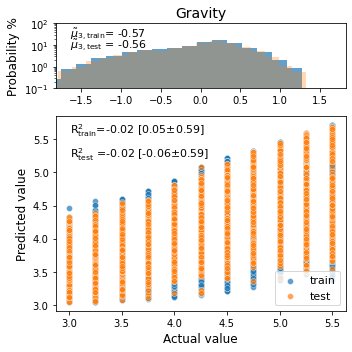

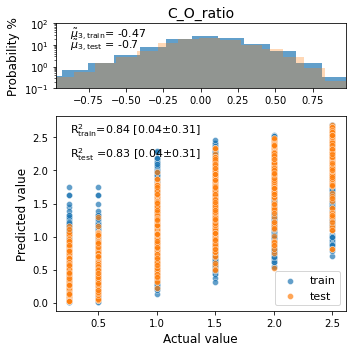

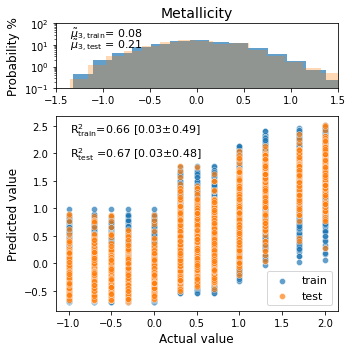

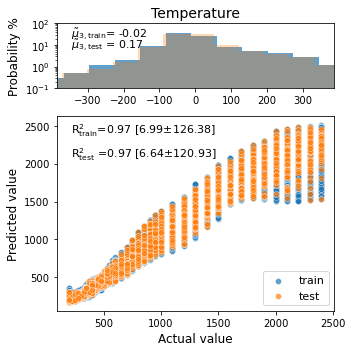

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )